In [2]:
pwd

'/Users/thabisomakhathini/Downloads'

In [3]:
import pandas as pd 


In [6]:
df = pd.read_excel('1673872777_ausapparalsales4thqrt2020 (1).xlsx')

In [7]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [8]:
df.tail()

,Date,Time,State,Group,Unit,Sales
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500
7559,2020-12-30,Evening,TAS,Seniors,13,32500


In [9]:
missing_data = df.isnull()

missing_data.head(20)

In [12]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

Date
False    7560
Name: Date, dtype: int64

Time
False    7560
Name: Time, dtype: int64

State
False    7560
Name: State, dtype: int64

Group
False    7560
Name: Group, dtype: int64

Unit
False    7560
Name: Unit, dtype: int64

Sales
False    7560
Name: Sales, dtype: int64



In [80]:
df.describe()

,Unit,Sales,Weekly,Monthly,Qaurtely
count,7560.000000,7560.000000,7560.000000,7560.000000,7560.0
mean,18.005423,45013.558201,46.455556,11.000000,4.0
std,12.901403,32253.506944,3.786662,0.816551,0.0
min,2.000000,5000.000000,40.000000,10.000000,4.0
25%,8.000000,20000.000000,43.000000,10.000000,4.0
50%,14.000000,35000.000000,46.500000,11.000000,4.0
75%,26.000000,65000.000000,50.000000,12.000000,4.0
max,65.000000,162500.000000,53.000000,12.000000,4.0


In [96]:
import numpy as np

In [105]:
df[['Group','Sales']].apply(np.max)

Group     Women
Sales    162500
dtype: object

In [106]:
df[['Group','Sales']].apply(np.min)

Group     Kids
Sales     5000
dtype: object

In [207]:
df[['State','Sales']].apply(np.max)

State        WA
Sales    162500
dtype: object

In [109]:
df[['State','Sales']].apply(np.min)

State     NSW
Sales    5000
dtype: object

In [129]:
df["Weekly"] = df["Date"].dt.isocalendar().week 
df["Monthly"] = df["Date"].dt.month
df["Qaurtely"] = df["Date"].dt.quarter 

In [46]:
df.head()

,Date,Time,State,Group,Unit,Sales,Weekly,Monthly,Qaurtely
0,2020-10-01,Morning,WA,Kids,8,20000,40,10,4
1,2020-10-01,Morning,WA,Men,8,20000,40,10,4
2,2020-10-01,Morning,WA,Women,4,10000,40,10,4
3,2020-10-01,Morning,WA,Seniors,15,37500,40,10,4
4,2020-10-01,Afternoon,WA,Kids,3,7500,40,10,4


In [122]:
Weekly_Report = df[['Weekly','Time','State','Group','Sales']]

In [124]:
Weekly_Report

,Weekly,Time,State,Group,Sales
0,40,Morning,WA,Kids,20000
1,40,Morning,WA,Men,20000
2,40,Morning,WA,Women,10000
3,40,Morning,WA,Seniors,37500
4,40,Afternoon,WA,Kids,7500
...,...,...,...,...,...
7555,53,Afternoon,TAS,Seniors,35000
7556,53,Evening,TAS,Kids,37500
7557,53,Evening,TAS,Men,37500
7558,53,Evening,TAS,Women,27500


In [125]:
Monthly_Report = df[['Monthly','Time','State','Group','Sales']]

In [126]:
Monthly_Report

,Monthly,Time,State,Group,Sales
0,10,Morning,WA,Kids,20000
1,10,Morning,WA,Men,20000
2,10,Morning,WA,Women,10000
3,10,Morning,WA,Seniors,37500
4,10,Afternoon,WA,Kids,7500
...,...,...,...,...,...
7555,12,Afternoon,TAS,Seniors,35000
7556,12,Evening,TAS,Kids,37500
7557,12,Evening,TAS,Men,37500
7558,12,Evening,TAS,Women,27500


In [127]:
Qaurtely_Report = df[['Qaurtely','Time','State','Group','Sales']]

In [128]:
Qaurtely_Report

,Qaurtely,Time,State,Group,Sales
0,4,Morning,WA,Kids,20000
1,4,Morning,WA,Men,20000
2,4,Morning,WA,Women,10000
3,4,Morning,WA,Seniors,37500
4,4,Afternoon,WA,Kids,7500
...,...,...,...,...,...
7555,4,Afternoon,TAS,Seniors,35000
7556,4,Evening,TAS,Kids,37500
7557,4,Evening,TAS,Men,37500
7558,4,Evening,TAS,Women,27500


In [130]:
import seaborn as sns

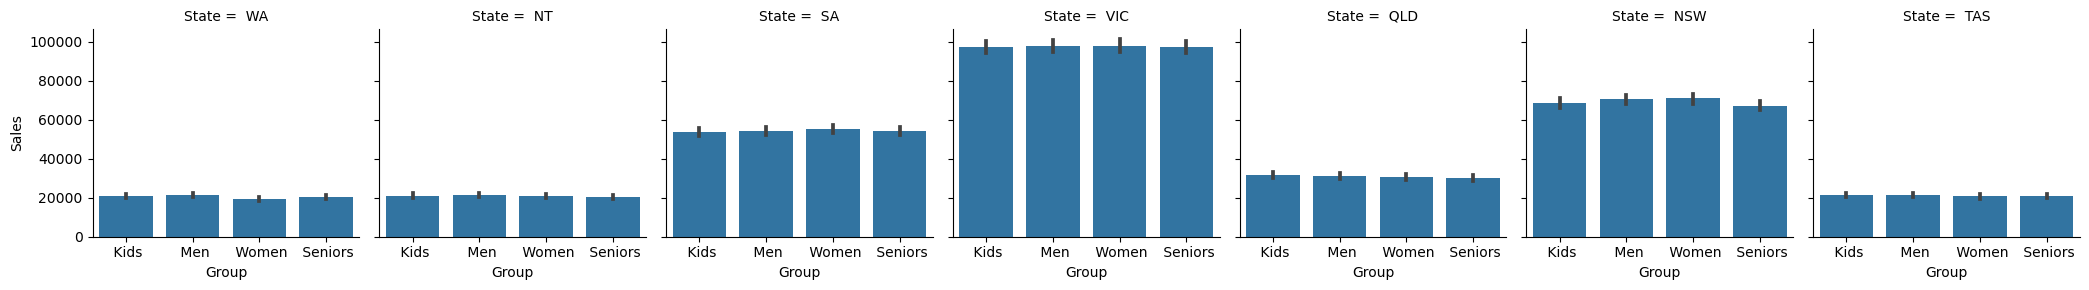

In [147]:
State_wise_sales_analysis = sns.FacetGrid (Qaurtely_Report , col = 'State')
State_wise_sales_analysis.map_dataframe (sns.barplot , y = 'Sales' , x = 'Group' , data = Qaurtely_Report );

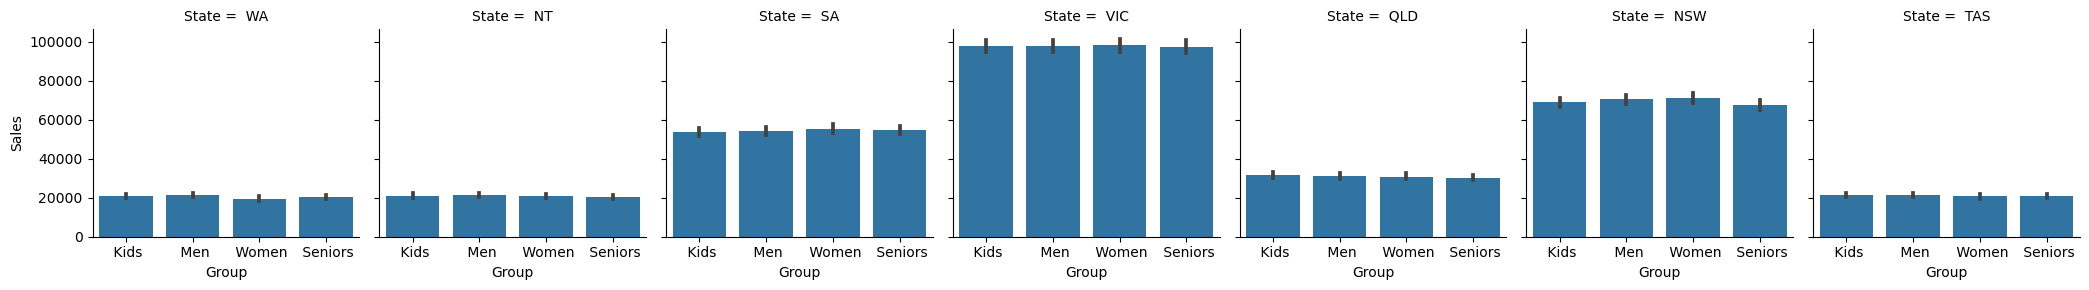

In [148]:
State_wise_sales_analysis = sns.FacetGrid ( Monthly_Report , col = 'State')
State_wise_sales_analysis.map_dataframe (sns.barplot , y = 'Sales' , x = 'Group' , data = Monthly_Report );

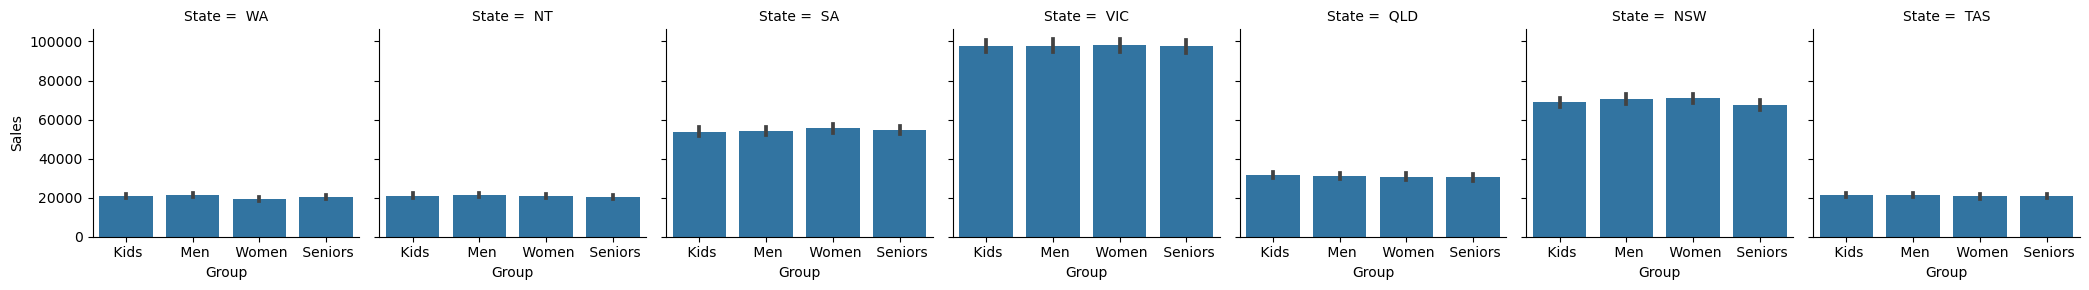

In [149]:
State_wise_sales_analysis = sns.FacetGrid ( Weekly_Report , col = 'State')
State_wise_sales_analysis.map_dataframe (sns.barplot , y = 'Sales' , x = 'Group' , data = Weekly_Report );

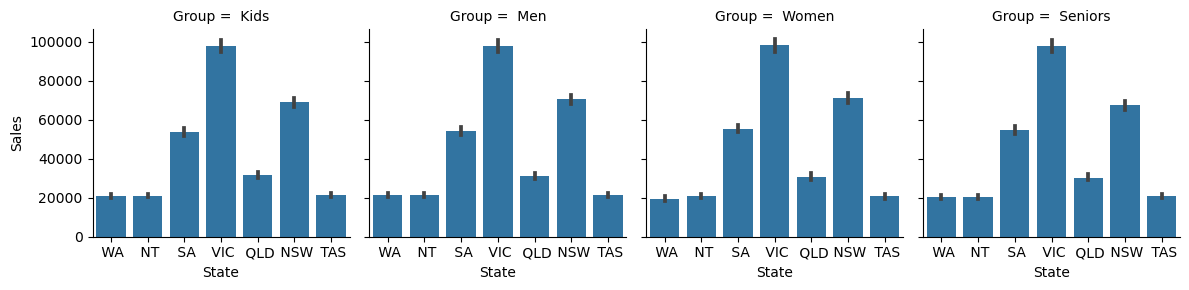

In [150]:
Group_wise_sales_analysis  = sns.FacetGrid ( Qaurtely_Report , col = 'Group')
Group_wise_sales_analysis .map_dataframe (sns.barplot , y = 'Sales' , x = 'State' , data = Qaurtely_Report );

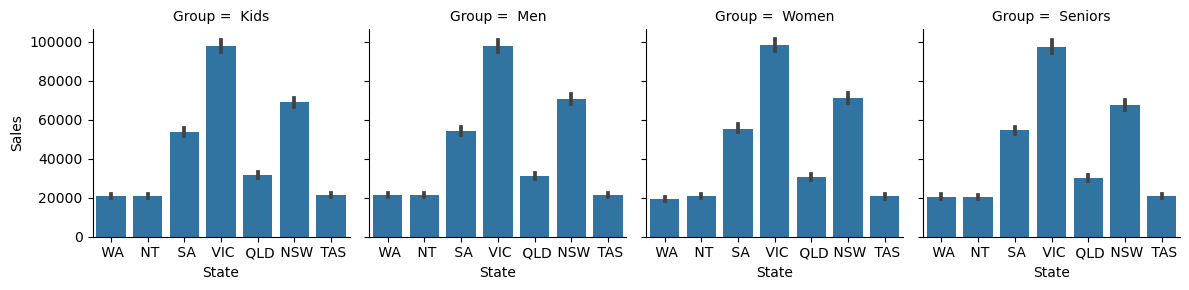

In [151]:
Group_wise_sales_analysis  = sns.FacetGrid ( Monthly_Report , col = 'Group')
Group_wise_sales_analysis .map_dataframe (sns.barplot , y = 'Sales' , x = 'State' , data =  Monthly_Report );

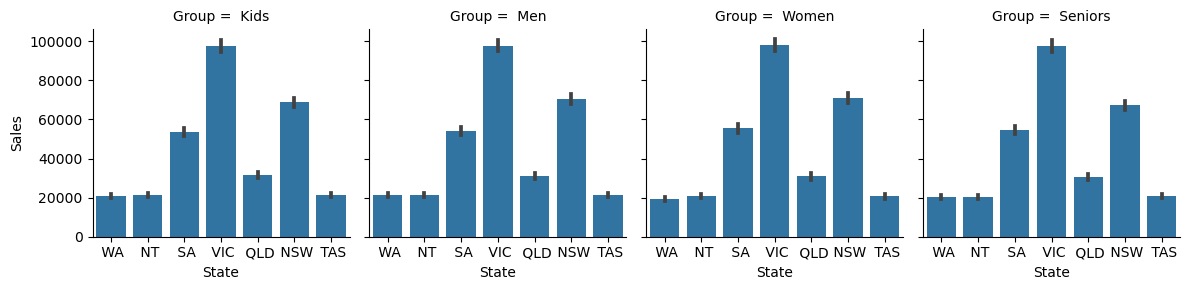

In [152]:
Group_wise_sales_analysis  = sns.FacetGrid ( Weekly_Report , col = 'Group')
Group_wise_sales_analysis .map_dataframe (sns.barplot , y = 'Sales' , x = 'State' , data = Weekly_Report );

In [202]:
Time_of_the_day_analysis = df[['Time','Sales']]

In [203]:
Time_of_the_day_analysis

,Time,Sales
0,Morning,20000
1,Morning,20000
2,Morning,10000
3,Morning,37500
4,Afternoon,7500
...,...,...
7555,Afternoon,35000
7556,Evening,37500
7557,Evening,37500
7558,Evening,27500


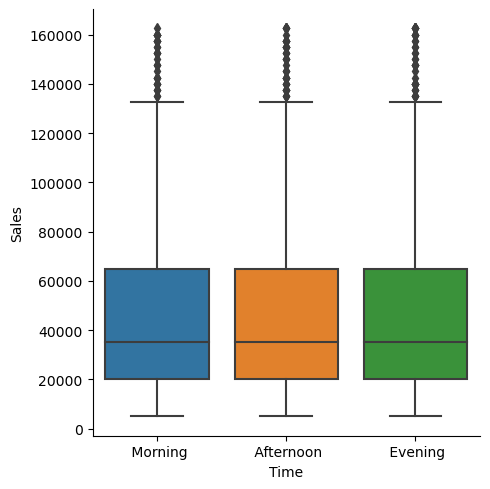

In [205]:
sns.catplot( x = "Time" , y = "Sales" , data = Time_of_the_day_analysis, kind = 'box')

df.to_csv